# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")
paths=list(path_to_dataSetFolder.glob("*.tdms"))
print(paths)
del paths[0]
[print(x) for x in paths]



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance
[WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123313_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123315_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123317_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123319_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123321_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123323_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123325_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/

[None, None, None, None, None, None, None, None, None]

## 3. Load in the data files

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance\CV_123315_ 1_MI.tdms


(<matplotlib.lines.Line2D at 0x1d84d470110>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

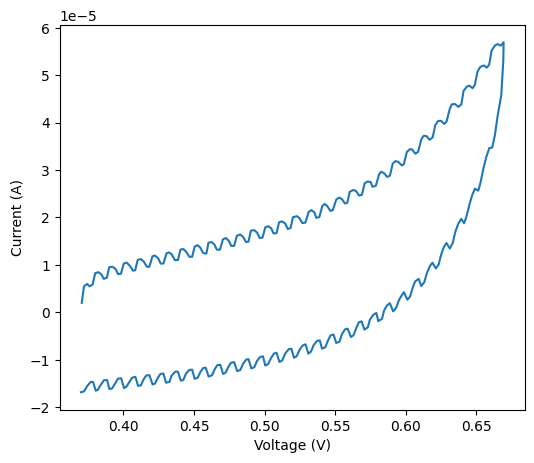

In [3]:
print(paths[0])
EC_Data(paths[0]).plot("E","i_3")

[<ec4py.util.Quantity_Value_Unit object at 0x000001D8505EBFD0>, <ec4py.util.Quantity_Value_Unit object at 0x000001D8505EBDD0>, <ec4py.util.Quantity_Value_Unit object at 0x000001D8505EBC90>, <ec4py.util.Quantity_Value_Unit object at 0x000001D8505EB990>, <ec4py.util.Quantity_Value_Unit object at 0x000001D8505EBA50>, <ec4py.util.Quantity_Value_Unit object at 0x000001D84D47D690>, <ec4py.util.Quantity_Value_Unit object at 0x000001D84C826390>, <ec4py.util.Quantity_Value_Unit object at 0x000001D84D4646D0>, <ec4py.util.Quantity_Value_Unit object at 0x000001D84D464810>]


C:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\src\ec4py\cv_datas.py:232: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  CV_plot.legend()


<Axes: xlabel='E vs RHE (V)', ylabel='i v$^{-1}$ (A V$^{-1}$ s)'>

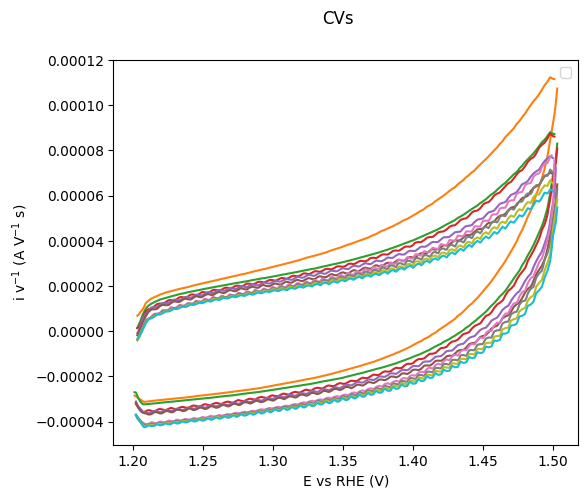

In [4]:
a=CV_Datas(paths,"i_3",y_smooth=5)
print(a.rate)
a.plot(RHE,RATE, LEGEND=RATE)

In [5]:
lsvs=a.get_sweep("DIF")

lsvs[0].rate
print(lsvs.dir)

DIF


In [6]:
ls=lsvs[0]

In [7]:
print(ls.get_i_at_E(0.5))
print(ls.get_i_at_E(0.5,AREA))
print(ls.get_i_at_E(0.5,RATE))
print(ls.area)
print(ls.rate)
# ls.plot(AREA)
print("NORMING",ls.get_norm_factor(AREA))
# ls.norm(AREA)
print(ls._direction(AVG))

2.711e-05 A
1.383e+00 A m^-2
5.422e-05 A V^-1 s
1.960e-05 m^2
5.000e-01 V s^-1
NORMING 1.960e-05 m^2
avg


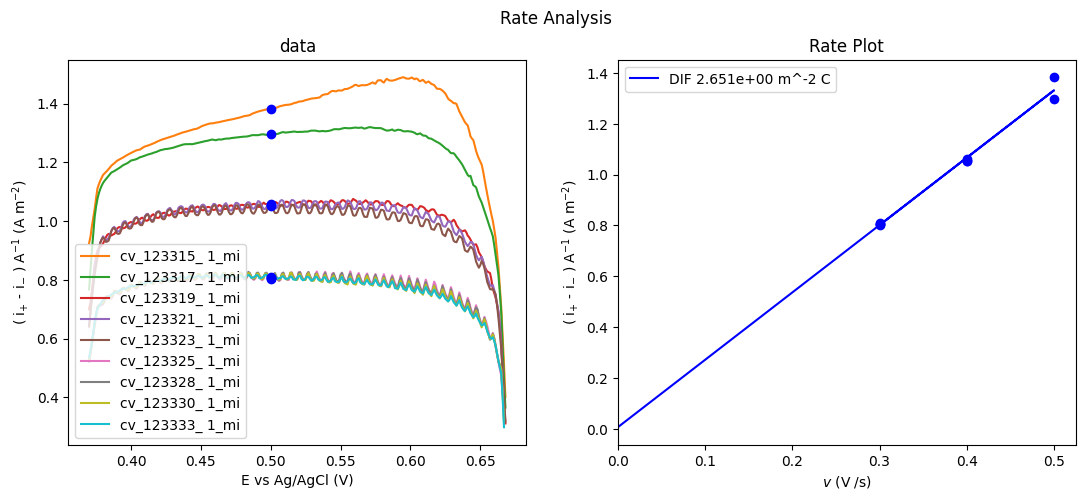

In [8]:
lsvs.RateAnalysis(0.5,AREA,dE=0.1)

In [9]:
lsvs[0].norm(AVG)

<Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i$_{-}$ (A)'>

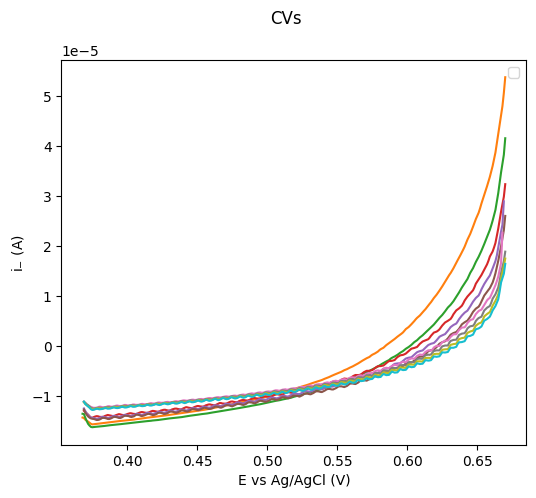

In [10]:
a.plot(NEG)

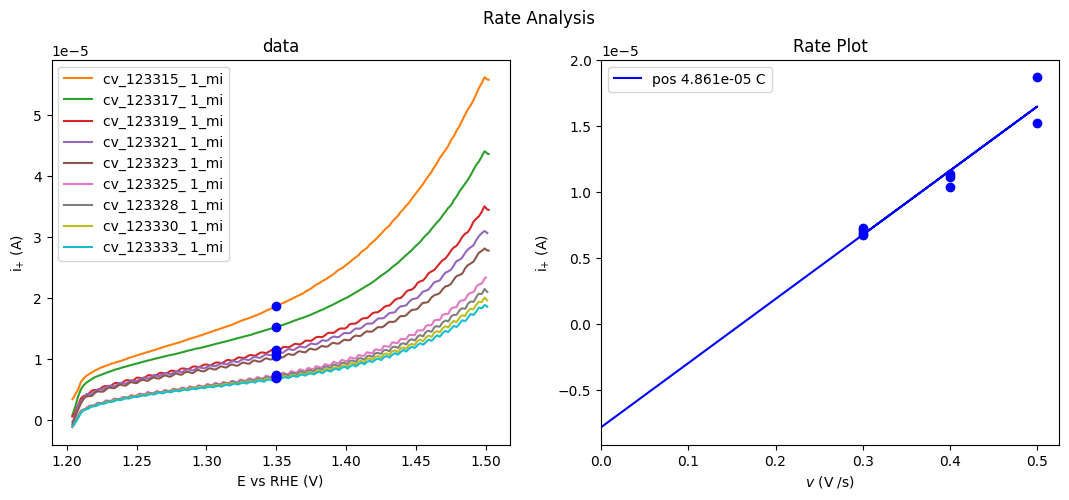

In [11]:


a.RateAnalysis(1.35,POS,RHE)

RanSev analysis
dir 	pos      	neg     
 :     	A / V^0.5 s^-0.5 	A / V^0.5
slope: 	-6.27e-06 	6.02e-05


(<ec4py.util.Quantity_Value_Unit at 0x1d8543da390>,
 <ec4py.util.Quantity_Value_Unit at 0x1d8543e0cd0>)

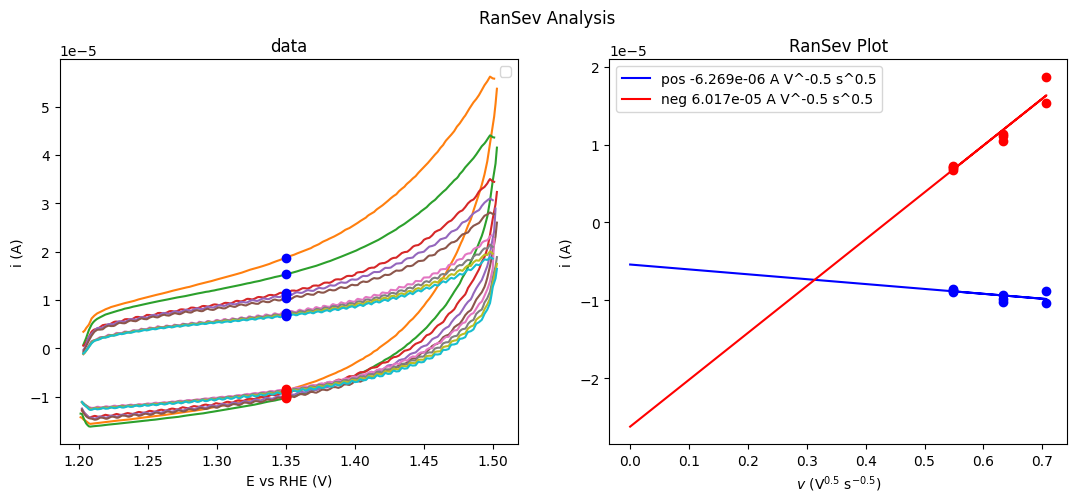

In [12]:
a.RanSev(1.35,RHE)

<Axes: xlabel='E vs Ag/AgCl (V)', ylabel='( i$_{+}$ - i$_{-}$ ) v$^{-1}$ (A V$^{-1}$ s)'>

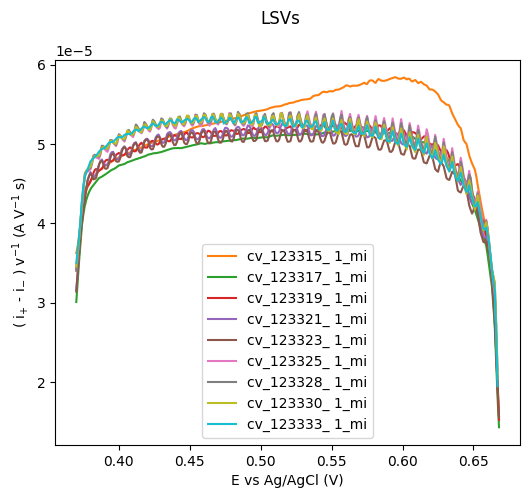

In [13]:
b=a.get_sweep("dif")
b.plot(RATE)
#b.rate